In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [61]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num",
           "marital_status", "occupation", "relationship", "race", "sex",
           "capital_gain", "capital_loss", "hours_per_week", "native_country",
           "income"]

In [62]:
data = pd.read_csv("data/adult.csv", header=None, names=columns)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [113]:
x = data.drop("income", axis=1)
y = data["income"]

In [114]:
print(y.unique())

[' <=50K' ' >50K']


In [115]:
y = np.array([0 if i == " <=50K" else 1 for i in y])

In [117]:
y.shape, x.shape

((32561,), (32561, 14))

In [118]:
for i in x:
    if x[i].dtypes == "object":
        tobe = pd.get_dummies(x[i], prefix=i + "_")
        x = x.join(tobe)
        x.drop(i, axis=1, inplace=True)

In [119]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass__ ?,workclass__ Federal-gov,workclass__ Local-gov,workclass__ Never-worked,...,native_country__ Portugal,native_country__ Puerto-Rico,native_country__ Scotland,native_country__ South,native_country__ Taiwan,native_country__ Thailand,native_country__ Trinadad&Tobago,native_country__ United-States,native_country__ Vietnam,native_country__ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
x.shape

(32561, 108)

In [121]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 108 entries, age to native_country__ Yugoslavia
dtypes: int64(6), uint8(102)
memory usage: 4.7 MB


In [122]:
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.1)

In [123]:
train_data.shape, train_labels.shape

((29304, 108), (29304,))

In [124]:
test_data.shape, test_labels.shape

((3257, 108), (3257,))

## Helper functions

In [126]:
def train_model(model, verbose=True):
    model.fit(train_data, train_labels)
    predicted = model.predict(test_data)
    acc = metrics.accuracy_score(test_labels, predicted)
    if verbose:
        print("Accuracy:", acc)
        cf = metrics.confusion_matrix(test_labels, predicted)
        print("Classification Report:\n")
        print(metrics.classification_report(test_labels, predicted))
        print("Confusion matrix")
        sns.heatmap(cf, annot=True)
    return acc

records = {}

## Decision Tree Classifier

Accuracy: 0.8120970217992017
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2446
           1       0.63      0.61      0.62       811

    accuracy                           0.81      3257
   macro avg       0.75      0.74      0.75      3257
weighted avg       0.81      0.81      0.81      3257

Confusion matrix


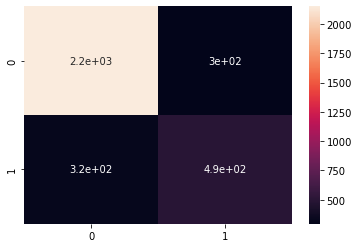

In [127]:
model_1 = DecisionTreeClassifier(criterion="entropy")
model_1_acc = train_model(model_1)

records["Decision Tree Classifier"] = model_1_acc

## Random Forest Classifier

Accuracy: 0.8394227817009517
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2446
           1       0.71      0.60      0.65       811

    accuracy                           0.84      3257
   macro avg       0.79      0.76      0.77      3257
weighted avg       0.83      0.84      0.83      3257

Confusion matrix


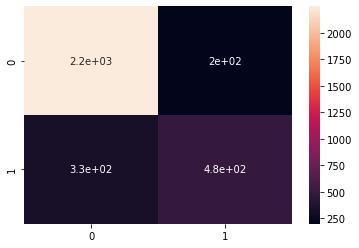

In [128]:
model_2 = RandomForestClassifier()
model_2_acc = train_model(model_2)
records["Random Forest Classifier"] = model_2_acc

## KNN Classifier

Accuracy: 0.7912189131102242
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2446
           1       0.87      0.19      0.31       811

    accuracy                           0.79      3257
   macro avg       0.83      0.59      0.59      3257
weighted avg       0.81      0.79      0.74      3257

Confusion matrix


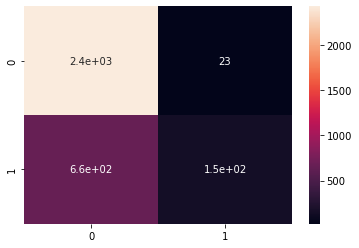

In [129]:
best_acc = 0.0
nn = -1
for i in range(1, 100):
    model_3 = KNeighborsClassifier(n_neighbors=i)
    val = train_model(model_3, verbose=False)
    if best_acc < val:
        best_acc = val
        nn = i
model_3_acc = train_model(KNeighborsClassifier(n_neighbors=nn))

records["KNN Classifier"] = model_3_acc

## Logistic Regression

Accuracy: 0.7859993859379797
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2446
           1       0.70      0.24      0.36       811

    accuracy                           0.79      3257
   macro avg       0.75      0.60      0.62      3257
weighted avg       0.77      0.79      0.74      3257

Confusion matrix


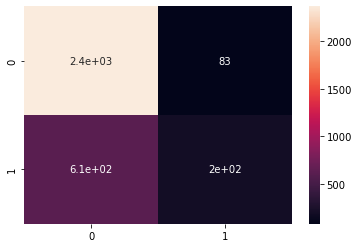

In [135]:
model_4 = LogisticRegression()
model_4_acc = train_model(model_4)

records["Logistic Regression"] = model_4_acc

## SVM CLassifier

Accuracy: 0.8375805956401596
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2446
           1       0.73      0.54      0.63       811

    accuracy                           0.84      3257
   macro avg       0.80      0.74      0.76      3257
weighted avg       0.83      0.84      0.83      3257

Confusion matrix


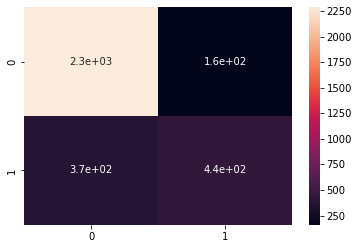

In [131]:
model_5 = make_pipeline(StandardScaler(), SVC())
model_5_acc = train_model(model_5)

records["SVM Classifier"] = model_5_acc

## Result

In [136]:
resulted_acc = pd.DataFrame({"Model": records.keys(), "Accuracy": records.values()}, [i for i in range(len(records))])
resulted_acc

,Model,Accuracy
0,Decision Tree Classifier,0.812097
1,Random Forest Classifier,0.839423
2,KNN Classifier,0.791219
3,Logistic Regression,0.785999
4,SVM Classifier,0.837581


## Best model

In [140]:
print("Best Model {} with Accuracy: {} %".format("Random Forest Classifier", max(resulted_acc.Accuracy) * 100))

Best Model Random Forest Classifier with Accuracy: 83.94227817009518 %
